In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("world_population.csv")

In [3]:
print(data.head(1))

   Rank CCA3 Country/Territory Capital Continent  2022 Population  \
0    36  AFG       Afghanistan   Kabul      Asia         41128771   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796         12486631         10752971      652230   

   Density (per km²)  Growth Rate  World Population Percentage  
0            63.0587       1.0257                         0.52  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [5]:
print(data.isna().sum())

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64


In [6]:
data = data.dropna()

In [7]:
data.shape

(234, 17)

In [8]:
data.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [9]:
print(f"Amount of duplicated : {data.duplicated().sum()}")

Amount of duplicated : 0


In [10]:
data.drop(['CCA3','Capital'], axis=1, inplace=True)

In [11]:
data.head(1)

Rank Country/Territory Continent  2022 Population  2020 Population  \
0    36       Afghanistan      Asia         41128771         38972230   

   2015 Population  2010 Population  2000 Population  1990 Population  \
0         33753499         28189672         19542982         10694796   

   1980 Population  1970 Population  Area (km²)  Density (per km²)  \
0         12486631         10752971      652230            63.0587   

   Growth Rate  World Population Percentage  
0       1.0257                         0.52

In [12]:
data.tail(3)

Rank Country/Territory Continent  2022 Population  2020 Population  \
231    46             Yemen      Asia         33696614         32284046   
232    63            Zambia    Africa         20017675         18927715   
233    74          Zimbabwe    Africa         16320537         15669666   

     2015 Population  2010 Population  2000 Population  1990 Population  \
231         28516545         24743946         18628700         13375121   
232         16248230         13792086          9891136          7686401   
233         14154937         12839771         11834676         10113893   

     1980 Population  1970 Population  Area (km²)  Density (per km²)  \
231          9204938          6843607      527968            63.8232   
232          5720438          4281671      752612            26.5976   
233          7049926          5202918      390757            41.7665   

     Growth Rate  World Population Percentage  
231       1.0217                         0.42  
232       1.0280                         0.25  
233       1.0204                         0.20

In [13]:
custom_palette = ['#0b3d91', '#e0f7fa', '#228b22', '#1e90ff', '#8B4513', '#D2691E',
 '#DAA520', '#556B2F']

In [14]:
countries_by_continent = data['Continent'].value_counts().reset_index().sort_values(by='Continent', ascending=True)
countries_by_continent

Continent  count
0         Africa     57
1           Asia     50
2         Europe     50
3  North America     40
4        Oceania     23
5  South America     14

In [15]:
fig = px.bar(
 countries_by_continent,
 x='Continent',
 y='count',
 color='Continent',
 text='count',
 title='Number of Countries by Continent',
 color_discrete_sequence=custom_palette
 )

fig.update_layout(
 xaxis_title='Continents',
 yaxis_title='Number of Countries',
 plot_bgcolor='rgba(0,0,0,0)', 
 font_family='Arial', 
 title_font_size=20
 )

fig.show()

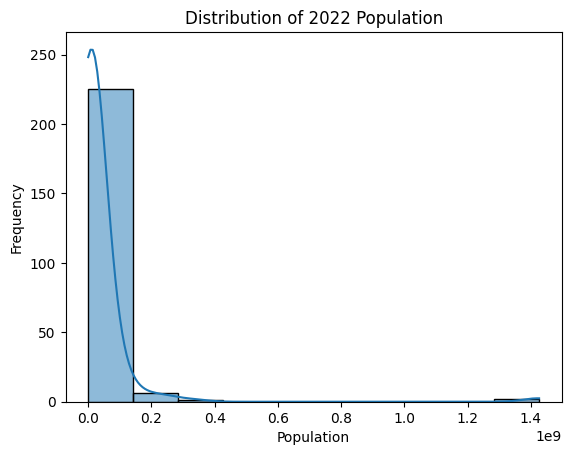

In [16]:
sns.histplot(data['2022 Population'], bins = 10, kde = True)
plt.title('Distribution of 2022 Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

In [17]:
data.columns

Index(['Rank', 'Country/Territory', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [18]:
data.groupby('Continent')['2022 Population'].mean().sort_values(ascending = False)

Continent
Asia             9.442767e+07
South America    3.120119e+07
Africa           2.503037e+07
North America    1.500740e+07
Europe           1.486295e+07
Oceania          1.958198e+06
Name: 2022 Population, dtype: float64

In [19]:
Top_10_Countries = data.sort_values(by = '2022 Population', ascending = False).head(10)

In [20]:
fig = px.bar(Top_10_Countries, x = 'Country/Territory', y = '2022 Population',
             title = 'Top 10 Countries By Population In 2022',
             template = 'plotly_white',
             text = '2022 Population',
             color = 'Country/Territory',
             color_discrete_sequence=custom_palette
)
fig.show()

In [21]:
data.rename(columns = {'Density (per km²)':'Density(km2)'}, inplace = True)

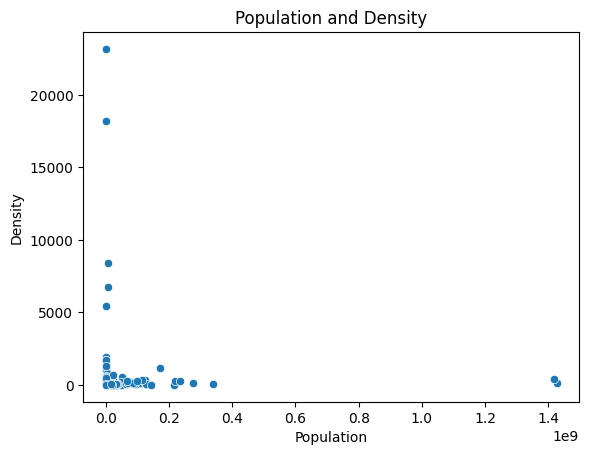

In [22]:
sns.scatterplot(x='2022 Population', y='Density(km2)', data = data)
plt.xlabel('Population')
plt.ylabel('Density')
plt.title('Population and Density')
plt.show()

In [23]:
Top_5_Countries_By_GrowthRate = data.sort_values(by = 'Growth Rate', ascending = False).head(5)
Growth_Rate = Top_5_Countries_By_GrowthRate['Growth Rate']
Countries = Top_5_Countries_By_GrowthRate['Country/Territory']

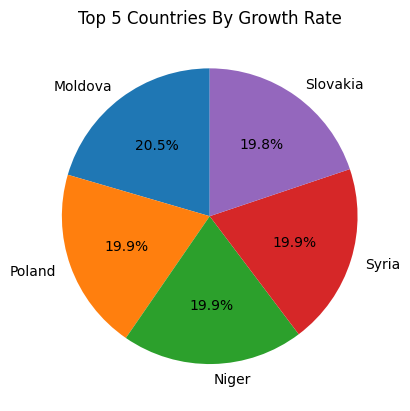

In [24]:
plt.pie(Growth_Rate, labels = Countries,
        autopct= '%1.1f%%', startangle= 90)
plt.title('Top 5 Countries By Growth Rate')
plt.show()

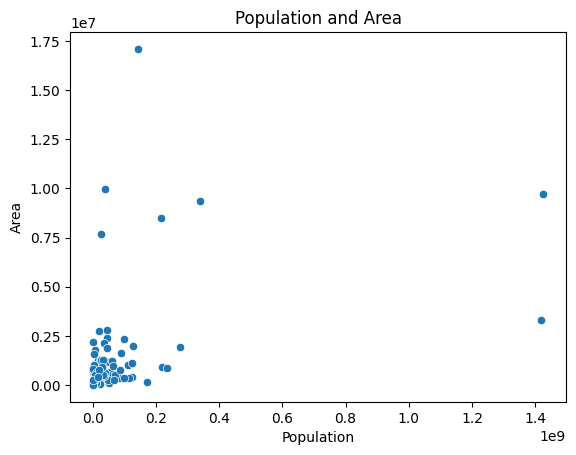

In [25]:
sns.scatterplot(x='2022 Population', y='Area (km²)', data = data)
plt.xlabel('Population')
plt.ylabel('Area')
plt.title('Population and Area')
plt.show()

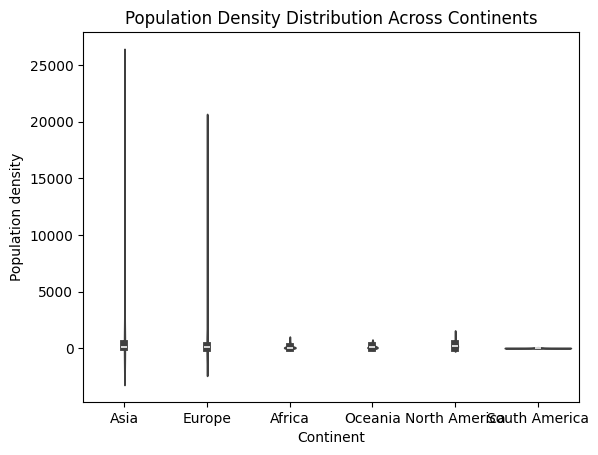

In [26]:
sns.violinplot(x='Continent', y= 'Density(km2)', data= data)
plt.title('Population Density Distribution Across Continents')
plt.xlabel('Continent')
plt.ylabel('Population density')
plt.show()

In [27]:
Continet_Population_pct = data.groupby('Continent')['World Population Percentage'].sum().reset_index().sort_values(by='World Population Percentage', ascending=False)
Continent = Continet_Population_pct['Continent']
World_Population_Percentage = Continet_Population_pct['World Population Percentage']

In [28]:
Continet_Population_pct

Continent  World Population Percentage
1           Asia                        59.19
0         Africa                        17.87
2         Europe                         9.33
3  North America                         7.51
5  South America                         5.48
4        Oceania                         0.55

In [29]:
fig = go.Figure(data=[go.Pie(labels=Continent,
 values=World_Population_Percentage)])

fig.update_layout(
 title='World Population Percentage by Continent',
 template='plotly',
 paper_bgcolor='rgba(255,255,255,0)', 
 plot_bgcolor='rgba(255,255,255,0)'
)

fig.update_traces(marker=dict(colors=custom_palette, line=dict(color='#FFFFFF',
 width=1)))
 
fig.show()

In [30]:
countries_by_continent

Continent  count
0         Africa     57
1           Asia     50
2         Europe     50
3  North America     40
4        Oceania     23
5  South America     14

In [31]:
data_melted = data.melt(
    id_vars=['Continent'],
    value_vars=['2022 Population', '2020 Population', '2015 Population', 
    '2010 Population', '2000 Population', '1990 Population',
    '1980 Population', '1970 Population'],
    var_name='Year',
    value_name='Population')
data_melted['Year'] = data_melted['Year'].str.split().str[0].astype(int)

population_by_continent = data_melted.groupby(['Continent','Year']).sum().reset_index()

In [32]:
fig = px.line(population_by_continent, x='Year', y='Population', color='Continent',
 title='Population Trends by Continent Over Time',
 labels={'Population': 'Population', 'Year': 'Year'},
 color_discrete_sequence=custom_palette)

fig.update_layout(
 template='plotly_white',
 xaxis_title='Year',
 yaxis_title='Population',
 font_family='Arial',
 title_font_size=20,
 )

fig.update_traces(line=dict(width=3))
fig.show()

In [33]:
growth = (data.groupby(by='Country/Territory')['2022 Population'].sum()-data.groupby(by='Country/Territory')['1970 Population'].sum()).sort_values(ascending=False).head(10)
growth

Country/Territory
India            859671872
China            603352887
Pakistan         176533990
Nigeria          162971948
Indonesia        160272945
United States    137961517
Brazil           118943623
Bangladesh       103644512
Ethiopia          95071678
DR Congo          78858479
dtype: int64

In [34]:
fig=px.bar(x=growth.index,
 y=growth.values,
 text=growth.values,
 color=growth.values,
 title='Growth Of Population From 1970 to 2020 (Top 10)', template='plotly_white'
)

fig.update_layout(xaxis_title='Country',
 yaxis_title='Population Growth')

fig.show()

In [35]:
Top_10_populated_countries_1970 = data.groupby('Country/Territory')['1970 Population'].sum().sort_values(ascending=False).head(10)
Top_10_populated_countries_1970 

Country/Territory
China            822534450
India            557501301
United States    200328340
Russia           130093010
Indonesia        115228394
Japan            105416839
Brazil            96369875
Germany           78294583
Bangladesh        67541860
Pakistan          59290872
Name: 1970 Population, dtype: int64

In [36]:
Top_10_populated_countries_2022 = data.groupby('Country/Territory')['2022 Population'].sum().sort_values(ascending=False).head(10)
Top_10_populated_countries_2022 

Country/Territory
China            1425887337
India            1417173173
United States     338289857
Indonesia         275501339
Pakistan          235824862
Nigeria           218541212
Brazil            215313498
Bangladesh        171186372
Russia            144713314
Mexico            127504125
Name: 2022 Population, dtype: int64

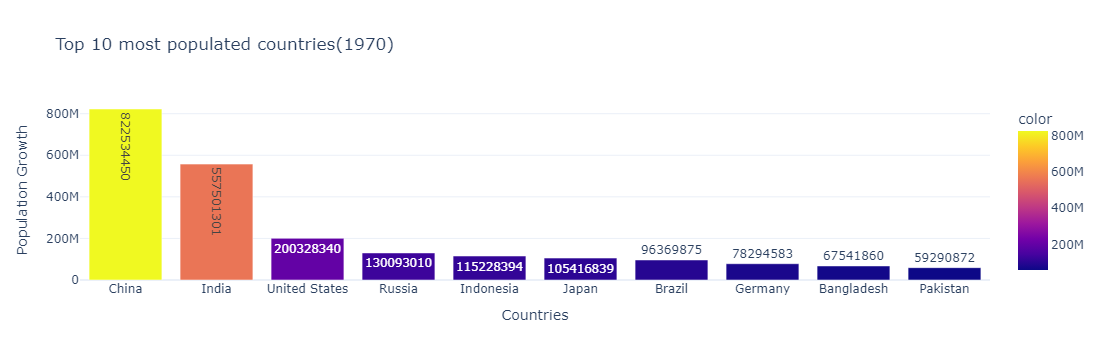

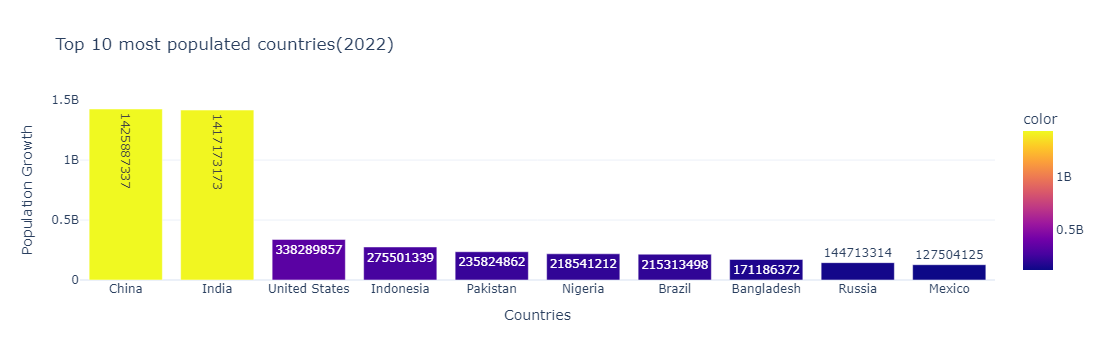

In [37]:
features = {
    'top_10_populated_countries_1970': Top_10_populated_countries_1970,
    'top_10_populated_countries_2022': Top_10_populated_countries_2022
}

for feature_name, feature_data in features.items():
    year = feature_name.split('_')[-1]
    fig = px.bar(x=feature_data.index,
                 y=feature_data.values,
                 text=feature_data.values,
                 color=feature_data.values,
                 title=f'Top 10 most populated countries({year})',
                 template='plotly_white')
    fig.update_layout(xaxis_title='Countries',
                      yaxis_title='Population Growth')
    fig.show()

In [38]:
sorted_data_growth = data.sort_values(by = 'Growth Rate', ascending = False)
top_fastest = sorted_data_growth.head(5)
top_slowest = sorted_data_growth.tail(5)

In [61]:
def plot_population_trends(countries):
    n_cols = 2
    n_rows = (len(countries) + n_cols - 1) // n_cols

    fig = sp.make_subplots(rows = n_rows, cols = n_cols, subplot_titles = countries,
          horizontal_spacing = 0.1, vertical_spacing = 0.1)

    for i, country in enumerate(countries, start = 1):
        country_df = data[data['Country/Territory'] == country]

        country_melted = country_df.melt(id_vars=['Country/Territory'],
                         value_vars=['2022 Population','2020 Population','2015 Population',
                                    '2010 Population','2000 Population','1990 Population',
                                    '1980 Population','1970 Population'],
                                     var_name = 'Year',
                                     value_name = 'Population')
        country_melted['Year'] = country_melted['Year'].str.split().str[0].astype(int) 
        line_fig = px.line(country_melted, x='Year', y='Population',color='Country/Territory',
                           labels={'Population':'Population', 'Year':'Year'},
                           color_discrete_sequence=custom_palette)
        row = (i-1)//n_cols +1
        col = (i-1)%n_cols +1
        for trace in line_fig.data:
               fig.add_trace(trace, row=row, col=col)

               fig.update_layout(
                    title='Population Trends of Selected Countries Over Time',
                    template='plotly_white',
                    font_family='Arial',
                    title_font_size=20,
                    showlegend=False,
                    height=600*n_rows
                    )


               fig.update_traces(line=dict(width=3))
               fig.update_xaxes(title_text='Year')
               fig.update_yaxes(title_text='Population')
               fig.show()
        
                                   

In [62]:
fastest = top_fastest[['Country/Territory', 'Growth Rate']].sort_values(by='Growth Rate',ascending=False).reset_index(drop=True)
fastest

Country/Territory  Growth Rate
0           Moldova       1.0691
1            Poland       1.0404
2             Niger       1.0378
3             Syria       1.0376
4          Slovakia       1.0359

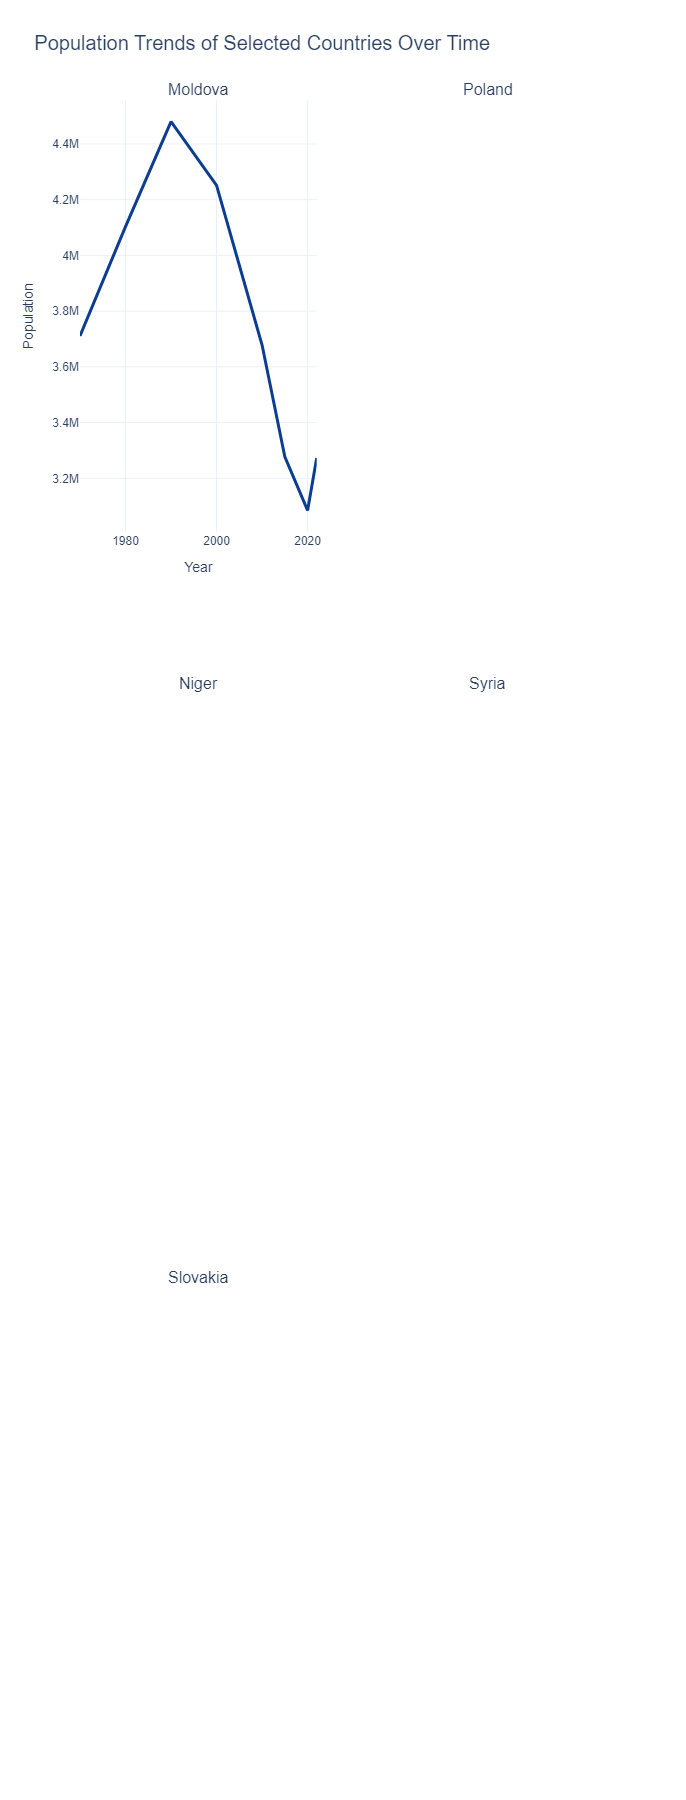

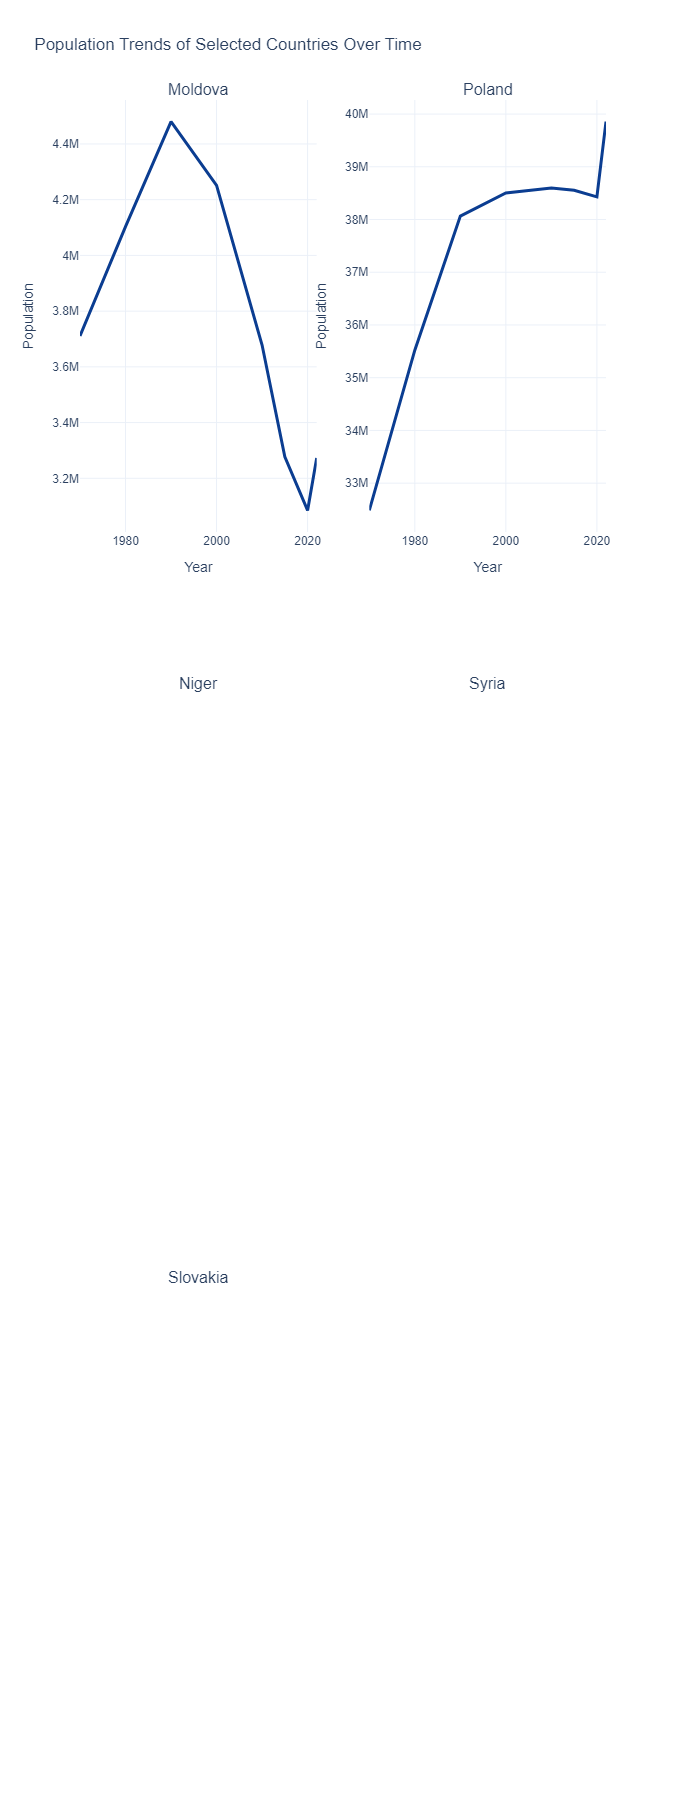

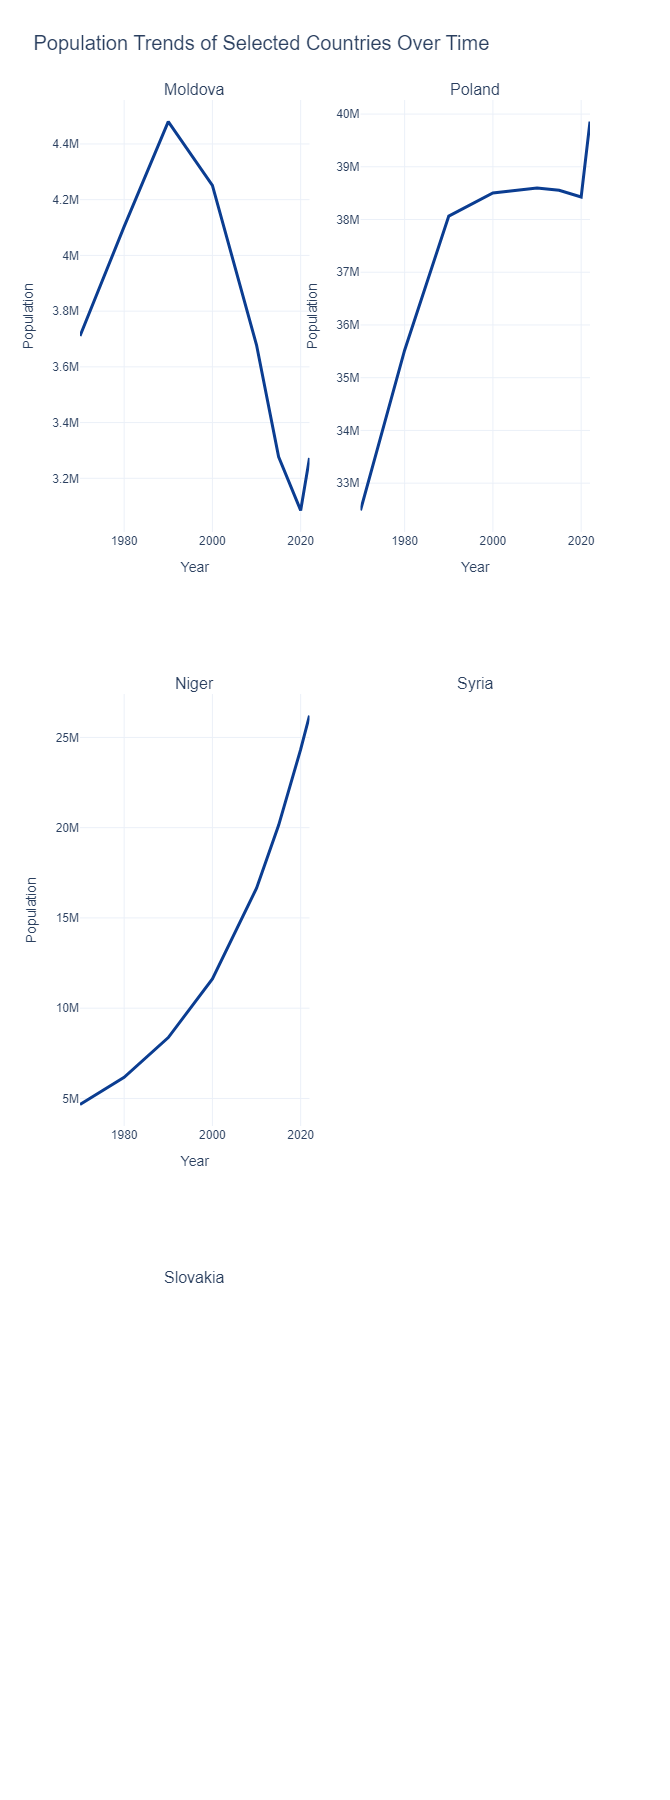

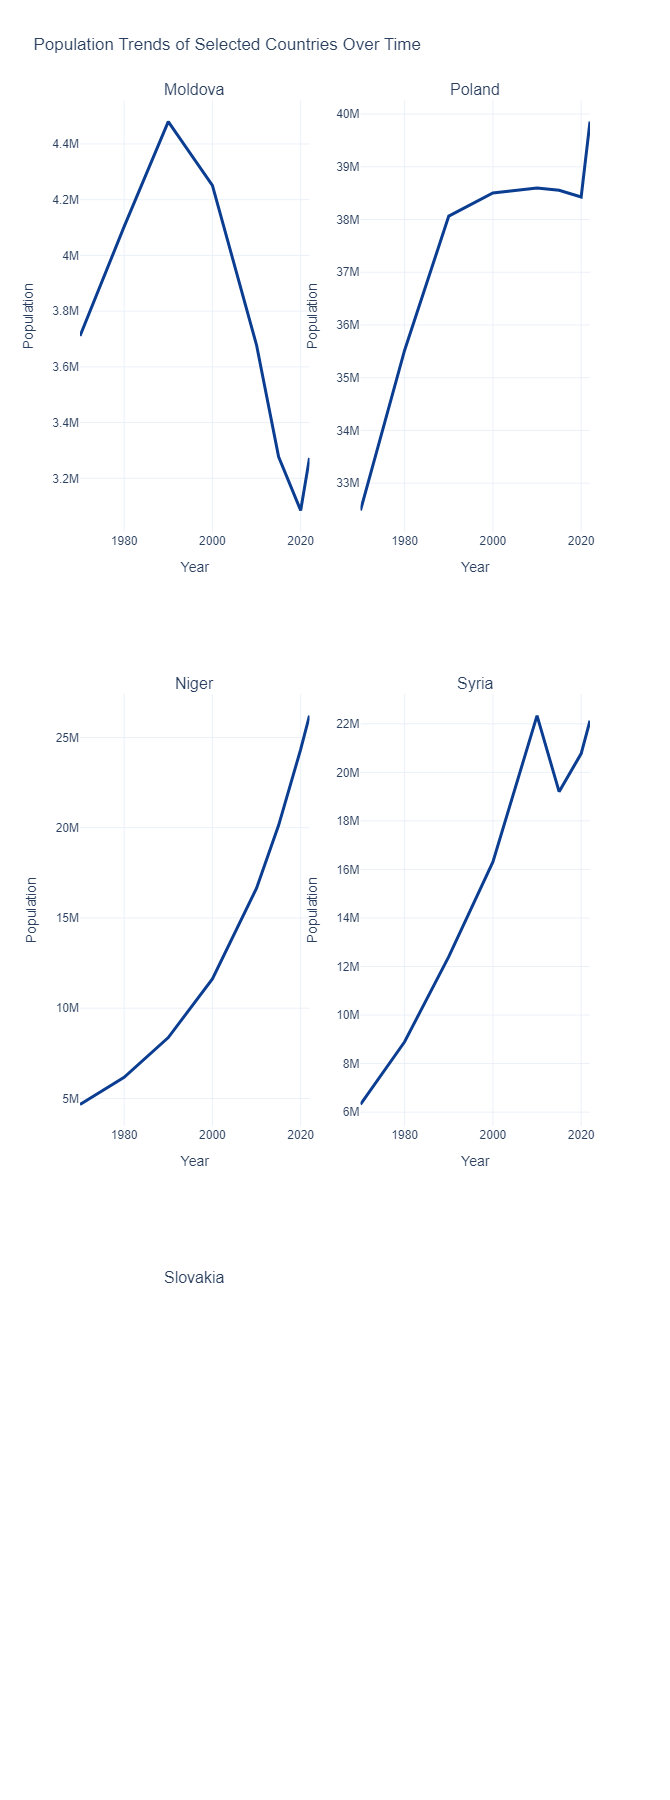

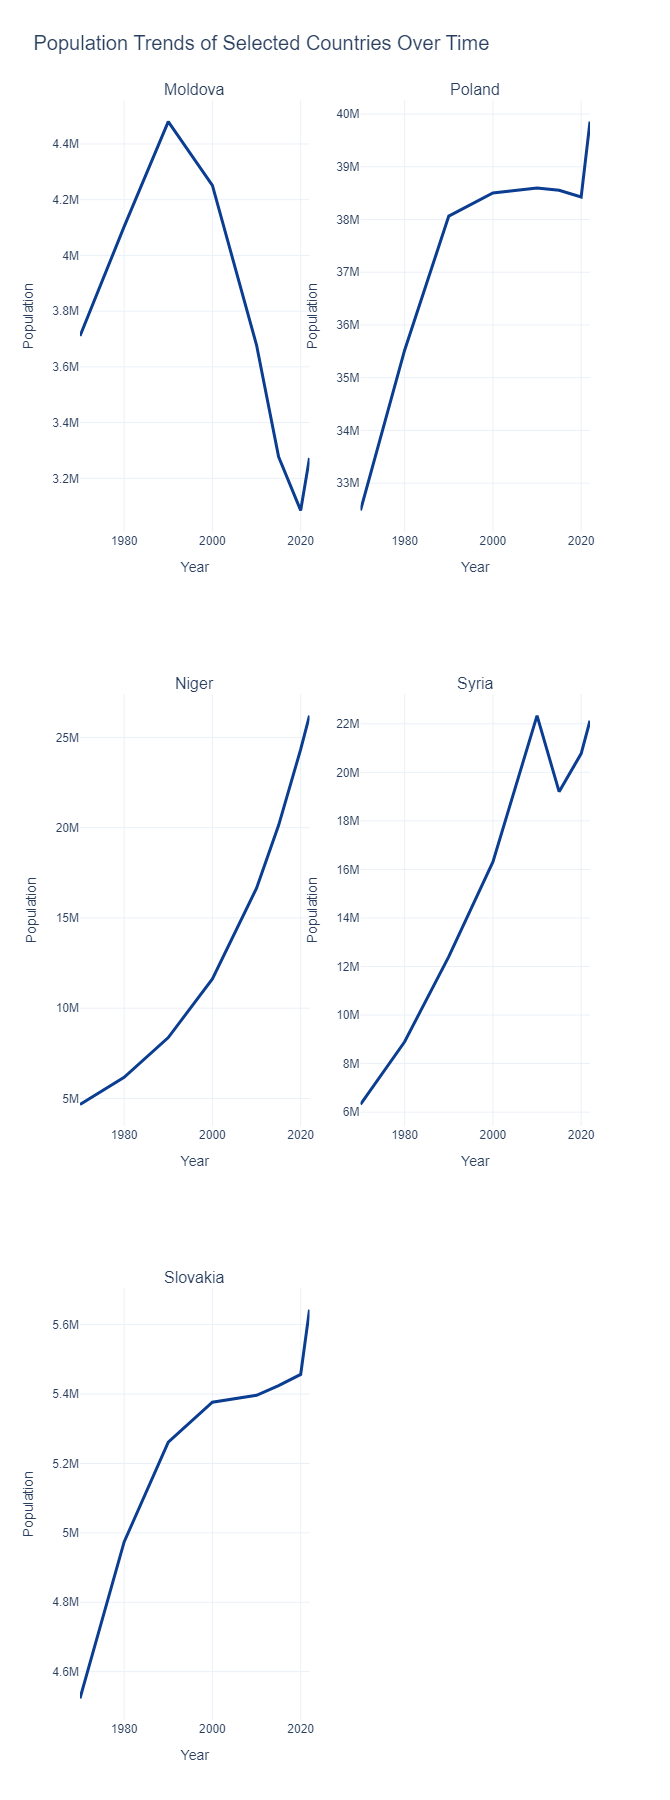

In [63]:
plot_population_trends(['Moldova', 'Poland', 'Niger', 'Syria', 'Slovakia'])

In [64]:
top_slowest

Rank Country/Territory Continent  2022 Population  2020 Population  \
117   141         Lithuania    Europe          2750055          2820267   
30    108          Bulgaria    Europe          6781953          6979175   
3     213    American Samoa   Oceania            44273            46189   
112   119           Lebanon      Asia          5489739          5662923   
218    38           Ukraine    Europe         39701739         43909666   

     2015 Population  2010 Population  2000 Population  1990 Population  \
117          2963765          3139019          3599637          3785847   
30           7309253          7592273          8097691          8767778   
3              51368            54849            58230            47818   
112          6398940          4995800          4320642          3593700   
218         44982564         45683020         48879755         51589817   

     1980 Population  1970 Population  Area (km²)  Density(km2)  Growth Rate  \
117          3521206          3210147       65300       42.1142       0.9869   
30           8980606          8582950      110879       61.1654       0.9849   
3              32886            27075         199      222.4774       0.9831   
112          2963702          2381791       10452      525.2334       0.9816   
218         49973920         47279086      603500       65.7858       0.9120   

     World Population Percentage  
117                         0.03  
30                          0.09  
3                           0.00  
112                         0.07  
218                         0.50

In [66]:
slowest = top_slowest[['Country/Territory','Growth Rate']].sort_values(by='Growth Rate', ascending=False).reset_index(drop=True)
slowest

Country/Territory  Growth Rate
0         Lithuania       0.9869
1          Bulgaria       0.9849
2    American Samoa       0.9831
3           Lebanon       0.9816
4           Ukraine       0.9120

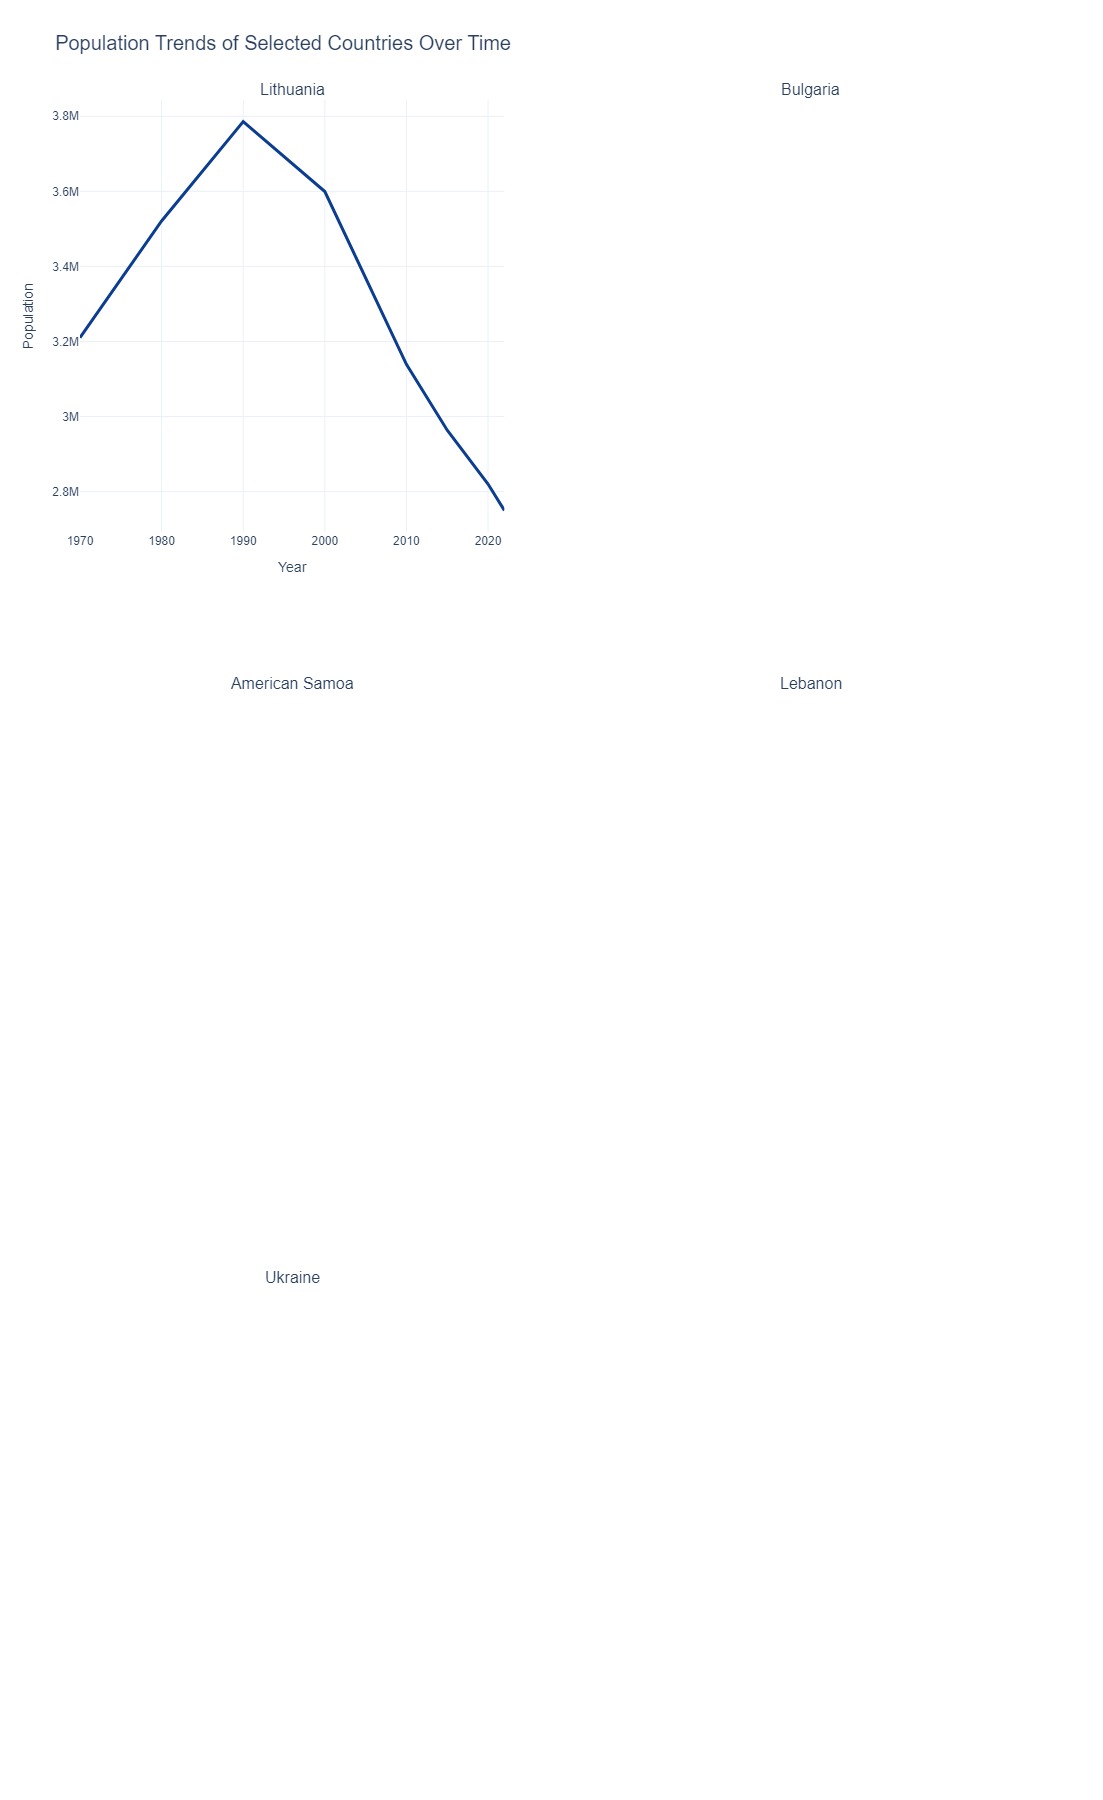

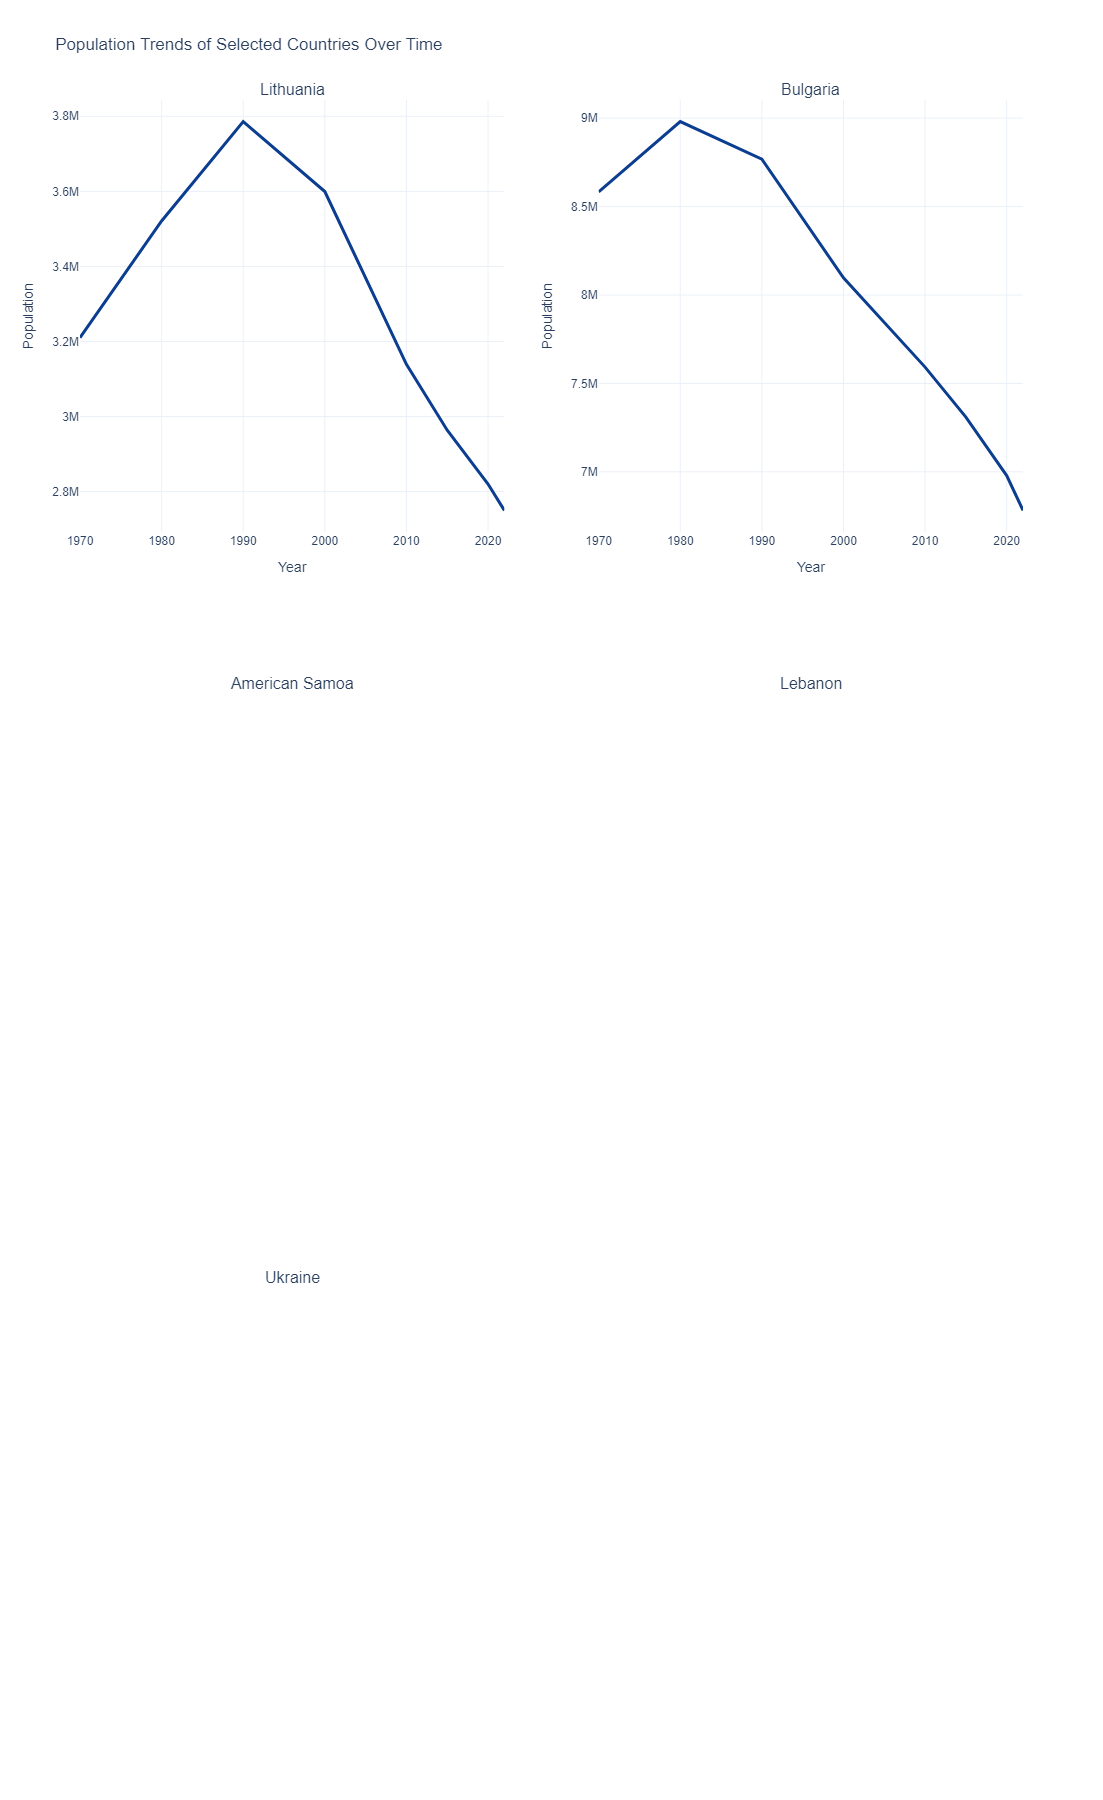

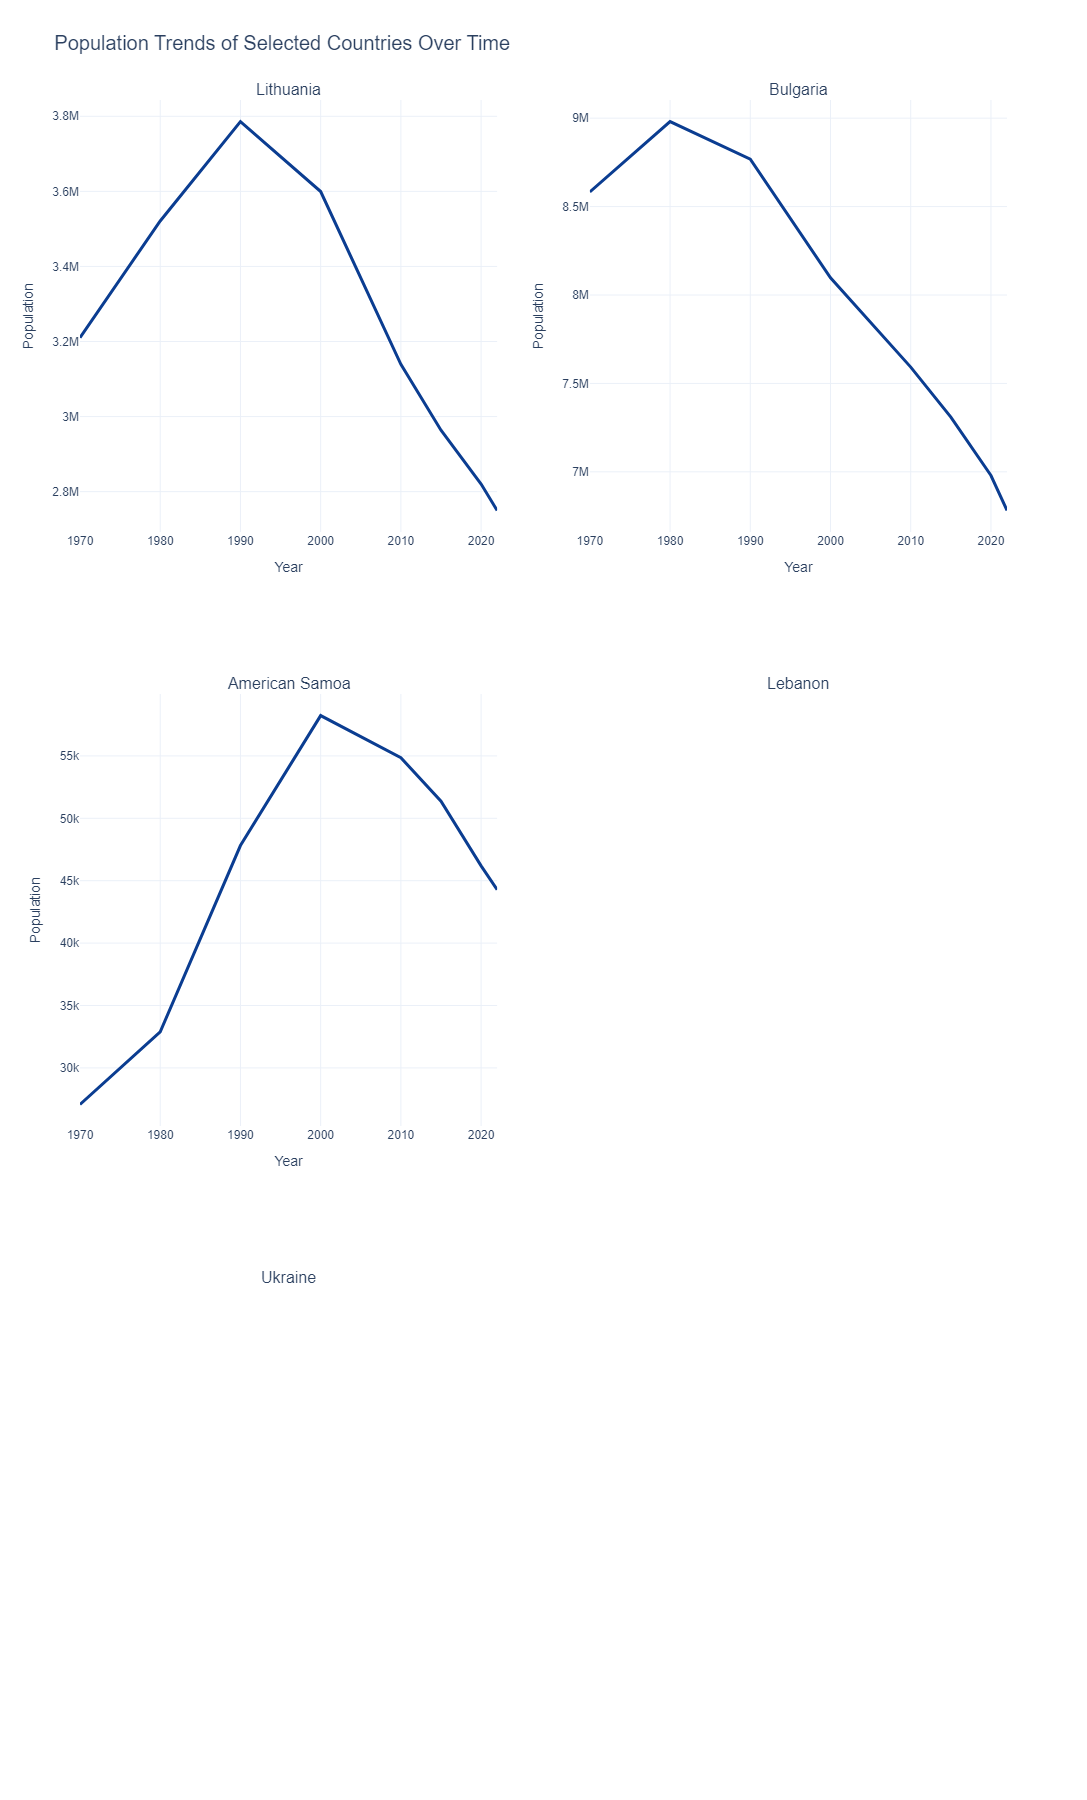

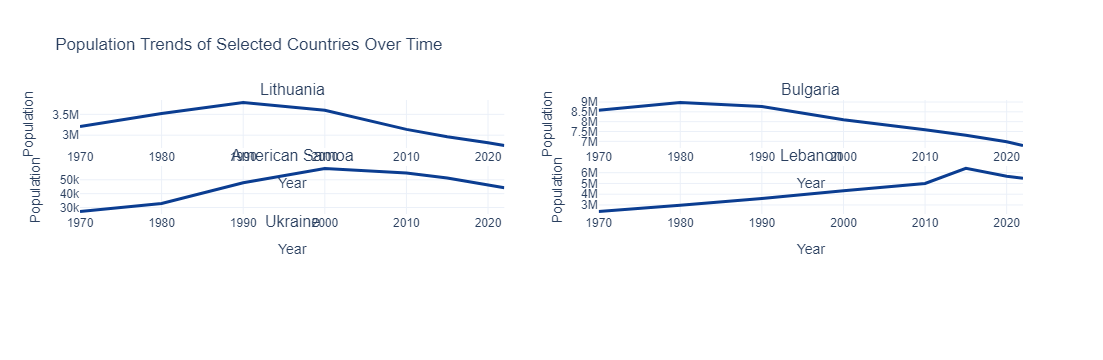

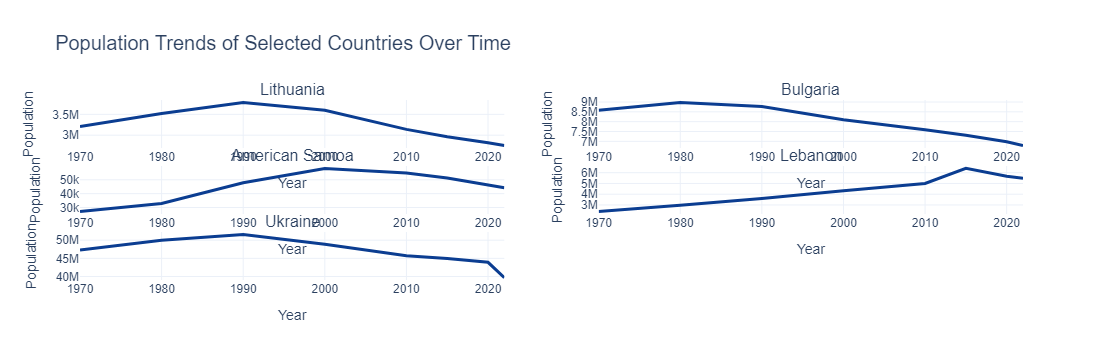

In [67]:
plot_population_trends(['Lithuania', 'Bulgaria', 'American Samoa', 'Lebanon', 'Ukraine'])

In [71]:
land_by_country = data.groupby('Country/Territory')['Area (km²)'].sum().sort_values(ascending=False)
most_land = land_by_country.head(5)
least_land = land_by_country.tail(5)
most_land
least_land

Country/Territory
Saint Barthelemy    21
Tokelau             12
Gibraltar            6
Monaco               2
Vatican City         1
Name: Area (km²), dtype: int64

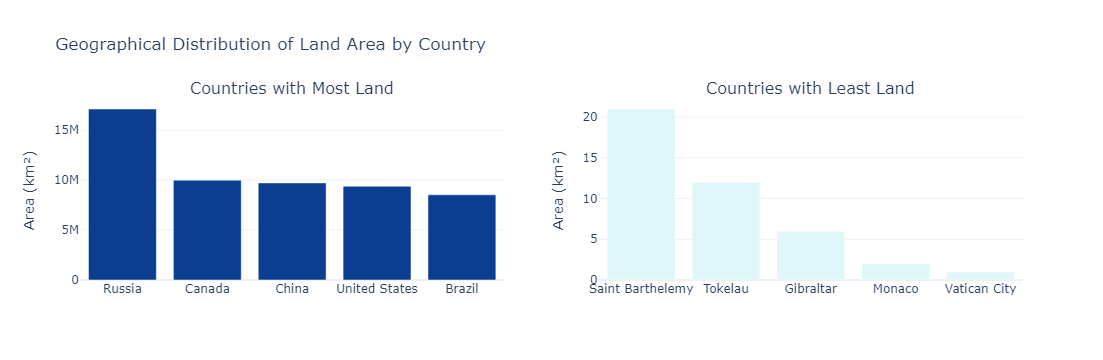

In [74]:
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Countries with Most Land', 'Countries with Least Land'))
fig.add_trace(go.Bar(x=most_land.index, y=most_land.values, name='Most Land',
                     marker_color=custom_palette[0]), row=1, col=1)
fig.add_trace(go.Bar(x=least_land.index, y=least_land.values, name='Least Land',
                     marker_color=custom_palette[1]), row=1, col=2)

fig.update_layout(
    title_text='Geographical Distribution of Land Area by Country',
    showlegend=False,
    template='plotly_white'
)

fig.update_yaxes(title_text='Area (km²)', row=1, col=1)
fig.update_yaxes(title_text='Area (km²)', row=1, col=2)

fig.show()

In [75]:
data.columns

Index(['Rank', 'Country/Territory', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density(km2)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [80]:
data['Area per Person'] = data['Area (km²)']/data['2022 Population']
country_area_per_person = data.groupby('Country/Territory')['Area per Person'].sum().sort_values(ascending=False)
most_land_available = country_area_per_person.head(5)
least_land_available = country_area_per_person.tail(5)
most_land_available
least_land_available

Country/Territory
Gibraltar    0.000184
Hong Kong    0.000147
Singapore    0.000119
Monaco       0.000055
Macau        0.000043
Name: Area per Person, dtype: float64

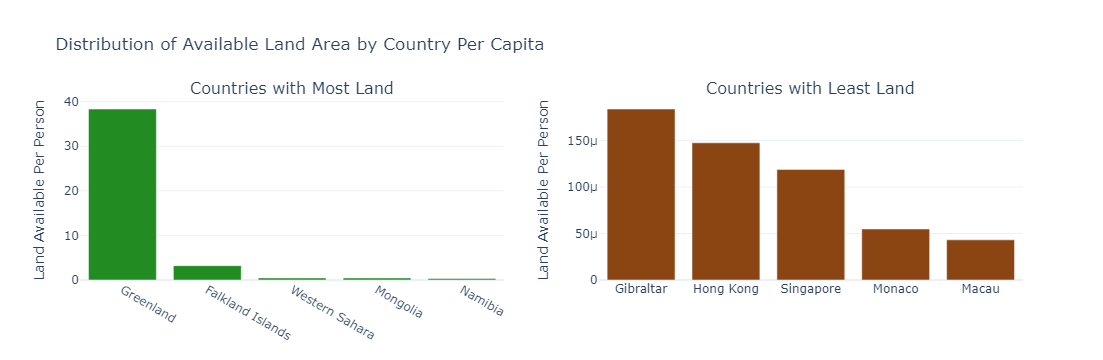

In [83]:
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Countries with Most Land',
                                                       'Countries with Least Land'))
fig.add_trace(go.Bar(x=most_land_available.index, y =most_land_available.values, name='Most Land', marker_color=custom_palette[2]), row=1, col=1)
fig.add_trace(go.Bar(x=least_land_available.index, y =least_land_available.values, name='Least Land', marker_color=custom_palette[4]), row=1, col=2)
fig.update_layout(
    title_text='Distribution of Available Land Area by Country Per Capita',
    showlegend = False,
    template='plotly_white'
)
fig.update_yaxes(title_text='Land Available Per Person', row=1, col=1)
fig.update_yaxes(title_text='Land Available Per Person', row=1, col=2)
fig.show()